In [2]:
import pandas as pd
import matplotlib.pyplot as plt

star_wars = pd.read_csv('star_wars.csv', encoding="ISO-8859-1")
print(star_wars.head(5))
print(star_wars.dtypes)

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           Response                      
1                                                Yes                      
2                                                NaN                      
3                                                 No                      
4                                                Yes                      

  Which of the following Star Wars films have you seen? Please selec

# Remove rows with empty respondent id

In [3]:
star_wars['RespondentID'].unique()

array([             nan,   3.29288000e+09,   3.29287954e+09, ...,
         3.28837529e+09,   3.28837307e+09,   3.28837292e+09])

In [4]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
print(star_wars['RespondentID'].unique())

[  3.29288000e+09   3.29287954e+09   3.29276527e+09 ...,   3.28837529e+09
   3.28837307e+09   3.28837292e+09]


# Cleaning and Mapping Yes/No Columns

In [5]:
cols = ['Have you seen any of the 6 films in the Star Wars franchise?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?']
yes_no = {'Yes': True, 'No': False}
for c in cols:
    star_wars[c] = star_wars[c].map(yes_no)
    

In [6]:
print(star_wars[cols[0]].unique())

[ True False]


# Cleaning and Mapping Checkbox Columns

In [7]:
# Series.map(dict)

import numpy as np
checkbox_fields = ['Which of the following Star Wars films have you seen? Please select all that apply.',
    'Unnamed: 4',
    'Unnamed: 5',
    'Unnamed: 6',
    'Unnamed: 7',
    'Unnamed: 8']
names = ['Star Wars: Episode I  The Phantom Menace',
    'Star Wars: Episode II  Attack of the Clones',
    'Star Wars: Episode III  Revenge of the Sith',
    'Star Wars: Episode IV  A New Hope',
    'Star Wars: Episode V The Empire Strikes Back',
    'Star Wars: Episode VI Return of the Jedi']
mappings = []
for n in names:
    mappings.append({n: True, np.nan: False})

for i, c in enumerate(checkbox_fields):
    print(star_wars[c].unique())
    star_wars[c] = star_wars[c].map(mappings[i])
    print(star_wars[c].unique())


['Star Wars: Episode I  The Phantom Menace' nan]
[ True False]
['Star Wars: Episode II  Attack of the Clones' nan]
[ True False]
['Star Wars: Episode III  Revenge of the Sith' nan]
[ True False]
['Star Wars: Episode IV  A New Hope' nan]
[ True False]
['Star Wars: Episode V The Empire Strikes Back' nan]
[ True False]
['Star Wars: Episode VI Return of the Jedi' nan]
[ True False]


In [8]:
# pandas.DataFrame.rename(dict) 
rename_mapping = {}
for i, n in enumerate(checkbox_fields):
    rename_mapping[n] = 'seen_%d'% (i+1)
print(rename_mapping)
print(star_wars.columns)
star_wars = star_wars.rename(columns=rename_mapping)
print(star_wars.columns)

# print(star_wars.head())

{'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1', 'Unnamed: 4': 'seen_2', 'Unnamed: 5': 'seen_3', 'Unnamed: 6': 'seen_4', 'Unnamed: 7': 'seen_5', 'Unnamed: 8': 'seen_6'}
Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       '

In [9]:
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½',
       'D

In [10]:
print(star_wars['seen_1'].value_counts())

True     673
False    513
Name: seen_1, dtype: int64


# Cleaning the Ranking Columns

In [11]:
# pandas.DataFrame.astype()
# star_wars.columns[9:15]
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [12]:
name_mapping = {}
for i, c in enumerate(star_wars.columns[9:15]):
    name_mapping[c] = 'ranking_%d' % (i+1)
print(name_mapping)
star_wars = star_wars.rename(columns=name_mapping)

{'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1', 'Unnamed: 10': 'ranking_2', 'Unnamed: 11': 'ranking_3', 'Unnamed: 12': 'ranking_4', 'Unnamed: 13': 'ranking_5', 'Unnamed: 14': 'ranking_6'}


In [13]:
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'

# Finding the Highest-Ranked Movie

4.0    237
6.0    168
3.0    130
1.0    129
5.0    100
2.0     71
Name: ranking_1, dtype: int64
5.0    300
4.0    183
2.0    116
3.0    103
6.0    102
1.0     32
Name: ranking_2, dtype: int64
6.0    217
5.0    203
4.0    182
3.0    150
2.0     47
1.0     36
Name: ranking_3, dtype: int64
1.0    204
6.0    161
2.0    135
4.0    130
3.0    127
5.0     79
Name: ranking_4, dtype: int64
1.0    289
2.0    235
5.0    118
3.0    106
4.0     47
6.0     41
Name: ranking_5, dtype: int64
2.0    232
3.0    220
1.0    146
6.0    145
4.0     57
5.0     36
Name: ranking_6, dtype: int64


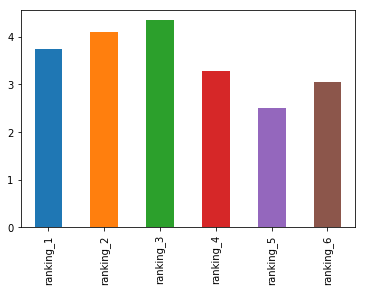

In [14]:
rank_cols = star_wars.columns[9:15]
rank_mean = star_wars[rank_cols].mean()
rank_mean.plot.bar()
for c in rank_cols:
    print(star_wars[c].value_counts())

# Finding the Most Viewed Movie

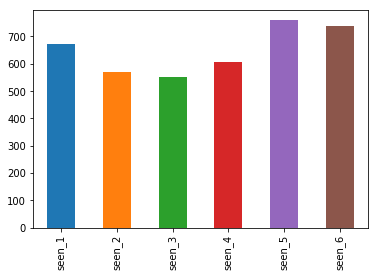

In [15]:
seen_cols = star_wars.columns[3:9]
seen_sum = star_wars[seen_cols].sum()
seen_sum.plot.bar()

# Exploring the Data by Binary Segments

In [16]:
col = 'Do you consider yourself to be a fan of the Star Wars film franchise?'
star_wars[col].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

seen_1    500
seen_2    463
seen_3    450
seen_4    483
seen_5    538
seen_6    537
dtype: int64
seen_1    173
seen_2    108
seen_3    100
seen_4    124
seen_5    220
seen_6    201
dtype: int64


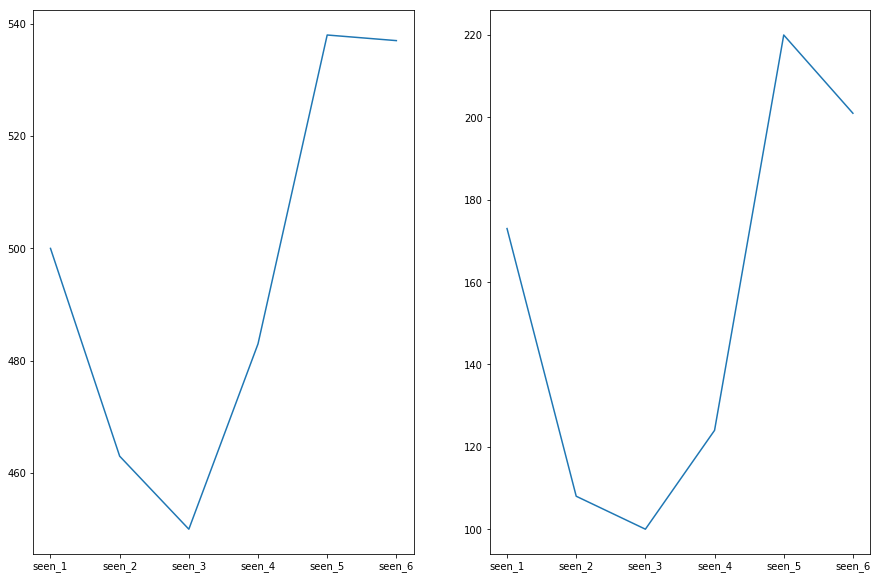

In [17]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

star_wars_fan = star_wars[star_wars[col] == True]
star_wars_no_fan = star_wars[star_wars[col] == False]

seen_cols = star_wars_fan.columns[3:9]

seen_sum_fan = star_wars_fan[seen_cols].sum()
print(seen_sum_fan)
seen_sum_no_fan = star_wars_no_fan[seen_cols].sum()
print(seen_sum_no_fan)

ax1.plot(seen_sum_fan)
ax2.plot(seen_sum_no_fan)

plt.show()

seen_1    500
seen_2    463
seen_3    450
seen_4    483
seen_5    538
seen_6    537
dtype: int64
seen_1    173
seen_2    108
seen_3    100
seen_4    124
seen_5    220
seen_6    201
dtype: int64


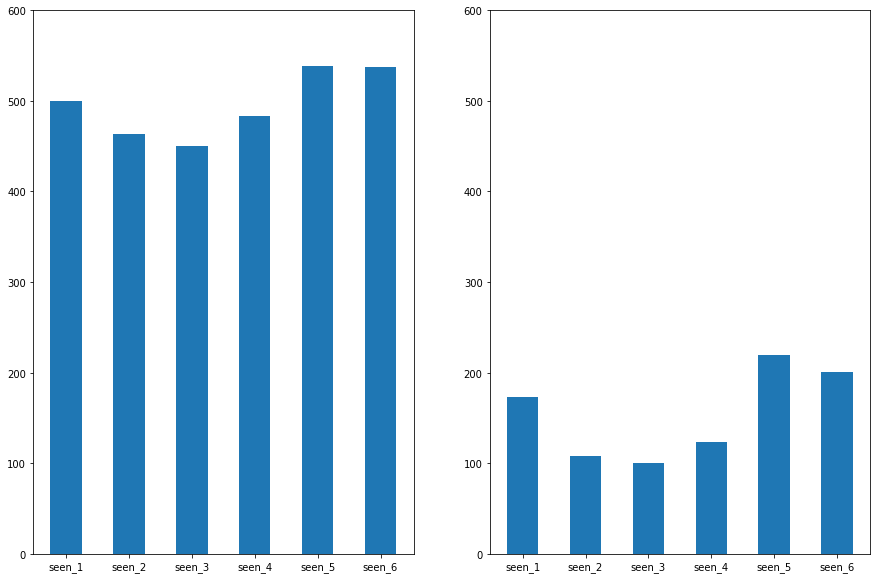

In [18]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

star_wars_fan = star_wars[star_wars[col] == True]
star_wars_no_fan = star_wars[star_wars[col] == False]

seen_cols = star_wars_fan.columns[3:9]

seen_sum_fan = star_wars_fan[seen_cols].sum()
print(seen_sum_fan)
seen_sum_no_fan = star_wars_no_fan[seen_cols].sum()
print(seen_sum_no_fan)

ax1.bar(x=seen_sum_fan.index, height=seen_sum_fan.values, width=0.5)
ax2.bar(x=seen_sum_no_fan.index, height=seen_sum_no_fan.values, width=0.5)
ax1.set_ylim(0, 600)
ax2.set_ylim(0, 600)
plt.show()

seen_1    500
seen_2    463
seen_3    450
seen_4    483
seen_5    538
seen_6    537
dtype: int64
seen_1    173
seen_2    108
seen_3    100
seen_4    124
seen_5    220
seen_6    201
dtype: int64


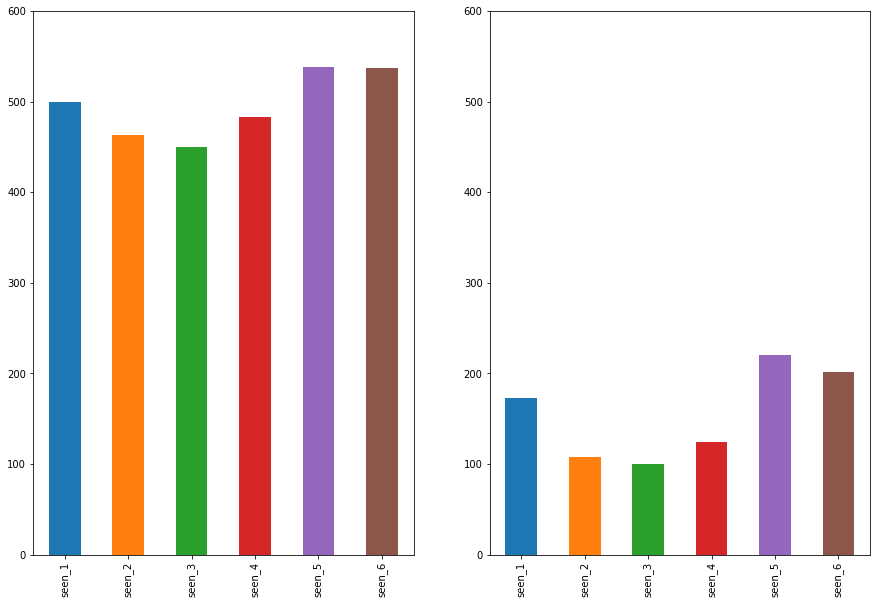

In [21]:
fig = plt.figure(figsize=(15, 10))

star_wars_fan = star_wars[star_wars[col] == True]
star_wars_no_fan = star_wars[star_wars[col] == False]

seen_cols = star_wars_fan.columns[3:9]

seen_sum_fan = star_wars_fan[seen_cols].sum()
print(seen_sum_fan)
seen_sum_no_fan = star_wars_no_fan[seen_cols].sum()
print(seen_sum_no_fan)

ax1 = fig.add_subplot(1, 2, 1)
seen_sum_fan.plot.bar()
ax1.set_ylim(0, 600)
ax2 = fig.add_subplot(1, 2, 2)
seen_sum_no_fan.plot.bar()
ax2.set_ylim(0, 600)
plt.show()